# Introduction
- Ce qu'on va faire dans ce TP : Se familiariser avec différents contextes d'usage du même outil de la famille des Réseaux de Neurones Artificiels (RNA) de type MLP
- Pourquoi : Pour comprendre que les problèmes pouvant être résolus sont variés, dans le champ de la classification et de la prédiction
- Comment : En étudiant la classification d'image en chiffres mansucrits, ou en objets, et de flux réseaux en protocoles de couche application ou en attaques, et la prédiction du nombre de flux

**Les questions auxquelles vous devez répondre sont en gras :**
- pour les questions d'interprétation, entrez votre texte de réponse dans la même cellule que la question, juste en dessous.
- pour les questions de programmation, entrez votre code dans une cellule de code juste en dessous de la question en gras.

**Au long du TP, analysez vos variables dans View -> Debug console -> onglet Jupyter**

# I. Représentation des données image

Téléchargeons une image en couleur :

In [ ]:
!wget --no-check-certificate -r 'https://www.i3s.unice.fr/~sassatelli/files/Parrot.png' -O Parrot.png

Attention : combiner -O avec -r ou -p signifie que tout le contenu téléchargé
sera placé dans le fichier unique indiqué.

--2025-10-16 08:11:18--  https://www.i3s.unice.fr/~sassatelli/files/Parrot.png
Résolution de www.i3s.unice.fr (www.i3s.unice.fr)… 134.59.130.31
Connexion à www.i3s.unice.fr (www.i3s.unice.fr)|134.59.130.31|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://webusers.i3s.unice.fr/~sassatelli/files/Parrot.png [suivant]
--2025-10-16 08:11:18--  https://webusers.i3s.unice.fr/~sassatelli/files/Parrot.png
Résolution de webusers.i3s.unice.fr (webusers.i3s.unice.fr)… 134.59.130.33
Connexion à webusers.i3s.unice.fr (webusers.i3s.unice.fr)|134.59.130.33|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 117412 (115K) [image/png]
Sauvegarde en : « Parrot.png »

Parrot.png          100%[===================>] 114,66K  --.-KB/s    ds 0,008s  

2025-10-16 08:11:19 (14,7 MB/s) — « Parrot.png » sauvegardé [

In [ ]:
%pwd

'/home/nas2/users/etudiant/b/bm404353/Téléchargements'

Examinons d'abord cette image en couleur :

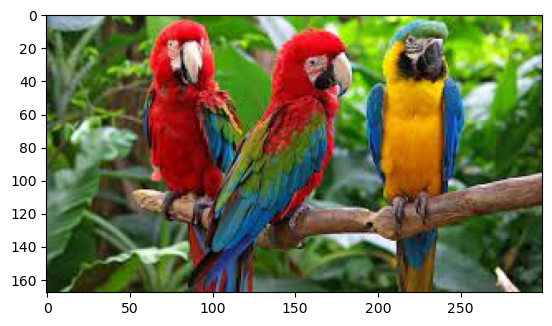

In [ ]:
import os
import matplotlib.pyplot as plt

image = plt.imread('Parrot.png')
plt.imshow(image)
plt.show()

puis on la convertit en en niveaux de gris :

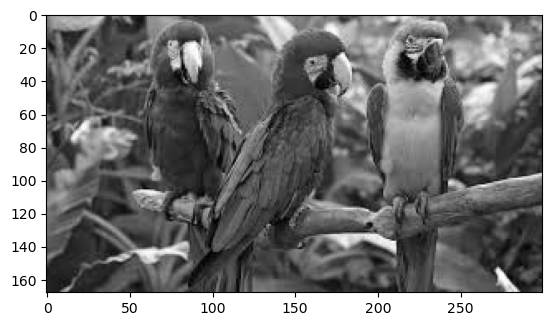

In [ ]:
from PIL import Image

# We create the gray-scale version by converting the original image
img = Image.open('Parrot.png')
img = img.convert('L')
img.save('Parrot_gray.png')

# We plot the resulting gray-scale version
image = plt.imread('Parrot_gray.png')
plt.imshow(image[:,:],cmap='gray')
plt.show()

Créez une cellule de code puis tapez *image* puis ctrl+Entrée, et de même pour *image.shape*. **Que déduisez-vous du format de données d'une image ?**  


In [ ]:
image

array([[0.49411765, 0.5411765 , 0.59607846, ..., 0.4627451 , 0.3647059 ,
        0.34117648],
       [0.48235294, 0.5294118 , 0.58431375, ..., 0.4509804 , 0.41568628,
        0.41568628],
       [0.46666667, 0.5058824 , 0.56078434, ..., 0.44705883, 0.45882353,
        0.4862745 ],
       ...,
       [0.14509805, 0.14117648, 0.13725491, ..., 0.2627451 , 0.27058825,
        0.2627451 ],
       [0.14509805, 0.14117648, 0.13725491, ..., 0.29803923, 0.3137255 ,
        0.31764707],
       [0.14509805, 0.14117648, 0.13725491, ..., 0.2901961 , 0.31764707,
        0.3254902 ]], dtype=float32)

In [ ]:
image.shape

(168, 300)

On peut déduire que : 
image est un array où chaque élémént represente un pixel de l'image et image.shape montre la taille total de l'image en pixels (168 lignes, 300 colonnes)

Exécutez le code ci-dessous. **Pouvez-vous deviner ce qu'il fait ?**  


Le code ci-dessous prend les 20 premiers lignes et les 30 premières colonnes de l'image et que tous les pixels seront gris.

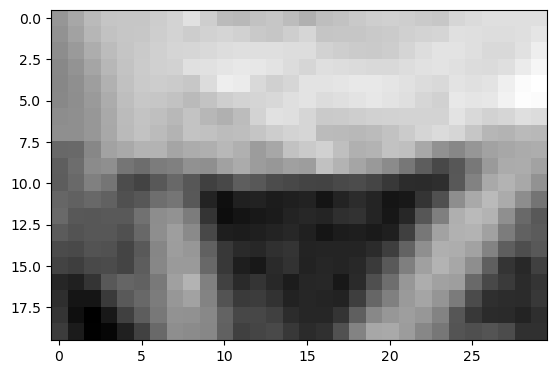

In [ ]:
plt.imshow(image[:20,:30],cmap='gray')
plt.show()

Une image en niveaux de gris est donc un tableau de taille (nombre de pixels en hauteur) x (nombre de pixels en largeur). Dans chaque cellule, le tableau stocke la valeur des luminances pour ce pixel. 

# II. Un réseau de neurones artificiels de type MLP pour reconnaître les chiffres manuscrits : le dataset MNIST

Cet ensemble de données de chiffres manuscrits contient 60000+10000 images en niveaux de gris de 28x28 pixels.  

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png
)

## Importer et comprendre les données



Nous commençons par importer l'ensemble de données MNIST à l'aide du code ci-dessous, ce qui entraîne la création des variables *X_train*, *Y_train*, *X_test* et *Y_test* :

In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

# load and split data between train and test (the first time you launch this command, it can take some time to effectively download the dataset)
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()


2025-10-16 09:02:24.595240: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-16 09:02:24.595459: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 09:02:24.628375: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-16 09:02:25.622067: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Rappelez-vous pourquoi nous divisons un ensemble de données en ensembles de formation et de test.**  

Nous analysons les données à l'aide du code ci-dessous. Vous pouvez explorer n'importe quelles données en adaptant le code ci-dessous.   
**Donnez une description de chaque variable.**

In [ ]:
print( 'shape of train data: ', X_train.shape) # contient 60000 images des chiffres manuscrits en niveaux de gris de 28 x 28 pixels
print( 'shape of test data: ', X_test.shape) # contient 10000 images pour vérifier l'integrité du modéle et au même format que celles de X_train
print( 'shape of train labels: ', Y_train.shape) # contient les étiquettes associée à chaque image d'entraînement

shape of train data:  (60000, 28, 28)
shape of test data:  (10000, 28, 28)
shape of train labels:  (60000,)


In [15]:
print(X_train[0]) # la première indice de la première dimension

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

**Faites une hypothèse sur le chiffre affiché, et vérifiez-la en complétant le code:**.

In [ ]:
#print(Y_...

## Préparer le format des données pour la classification

Comme vous l'avez vu dans le cours, tout tableau/grille/image introduit dans un MLP doit d'abord être aplati.  
Nous normalisons également les valeurs afin que toutes les valeurs soient comprises entre 0 et 1.

In [9]:
#print(X_train[0])

# we flatten ...
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(5000, 784)

print(X_train[0])

ValueError: cannot reshape array of size 7840000 into shape (5000,784)

In [7]:
# ... and normalize the data (grey levels are integers from 0 to 255)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

**Comment décrivez-vous les modifications subies par *X_train[0]* ?**  


Une autre étape consiste à vectoriser les étiquettes : au lieu d'avoir un "1" ou un "5", etc., correspondant à chaque échantillon d'apprentissage *X_train[i]*, nous faisons de chaque étiquette un vecteur de 10 zéros, avec un 1 uniquement sur le chiffre de droite :

In [ ]:
nb_classes = 10 # 10 digits from 0 to 9
import keras as keras
#from keras import utils as np_utils
from tensorflow.keras import utils as np_utils

y_train = np_utils.to_categorical(Y_train, nb_classes)
y_test = np_utils.to_categorical(Y_test, nb_classes)

print('shape of yTrain :', y_train.shape)

print(Y_train[0])
print(y_train[0])

**A partir des résultats ci-dessus, analysez la différence entre *Y_train[0]* avant transformation et *y_train[0]* après transformation.**  


## Créer un classificateur MLP

Pour créer un ANN spécifique, ici un MLP avec une architecture (nombre de couches, nombre de neurones, etc.) de notre choix, il existe plusieurs bibliothèques de code qui rendent le travail très simple. L'une des principales bibliothèques de ce type est [Keras] (https://keras.io/), une bibliothèque de réseaux neuronaux open source écrite en Python. Conçue pour permettre une expérimentation rapide des réseaux neuronaux profonds, elle est conviviale, modulaire et extensible. Nous pouvons créer un modèle complet avec seulement quelques lignes de code.  

Par exemple, le MLP correspondant à cette figure :  
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/74_blog_image_2.png" width="500"/>  
peut être créé avec les 4 lignes de code suivantes :  

```
model = Sequential()
model.add(Dense(6, input_dim=5))
model.add(Dense(8))
model.add(Dense(2))
```
**Pouvez-vous décrire l'action effectuée par chaque ligne ci-dessus ?**  


Réalisons maintenant un modèle MLP avec une seule couche cachée composée d'un seul neurone :

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1, input_dim=784, activation='relu')) # Using only one neuron, activation is sigma in the slides
model.add(Dense(nb_classes, activation='softmax')) # Output layer, softmax ensures that every output neuron/digit score sums up to 1 (like a probability)

# Print the architecture of the model:
model.summary()

1. **Dessinez ce réseau** (avec l'outil de votre choix ou simplement [ici](https://www.autodraw.com/), et collez l'image ci-dessous).  
2. **Expliquez le nombre de paramètres de chaque couche.**

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

# Start the training:
print("Training....")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

In [ ]:
print("Testing...")
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Que pouvez-vous dire des courbes d'erreur ?**

**L'exactitude (*accuracy*) semble-t-elle stagner ?**    
**La valeur atteinte par l'exactitude est-elle proche de 90% ?**  
**Quel est le problème à votre avis ?**  

**Reprenez le code et refaites un autre RNA, et ré-entraînez-le, pour que l'exactitude dépasse 90% ci-dessous :**

In [ ]:
# ... à compléter...

# III. Un MLP pour la classification de flux en attaques : le dataset CICIDS2017

https://www.unb.ca/cic/datasets/ids-2017.html 
CICIDS2017 dataset contains benign and the most up-to-date common attacks, which resembles the true real-world data (PCAPs). It also includes the results of the network traffic analysis using CICFlowMeter with labeled flows based on the time stamp, source, and destination IPs, source and destination ports, protocols and attack (CSV files). Also available is the extracted features definition.

Generating realistic background traffic was our top priority in building this dataset. We have used our proposed B-Profile system (Sharafaldin, et al. 2016) to profile the abstract behavior of human interactions and generates naturalistic benign background traffic. For this dataset, we built the abstract behavior of 25 users based on the HTTP, HTTPS, FTP, SSH, and email protocols.

**Objectif :** A partir d'une trace de trafic similaire à celle du dataset de Univ. Cauca, reconnaître si un flow constitue une attaque.  
Cette partie met donc en oeuvre les mêmes étapes que pour la partie classification d'image.

In [ ]:
!wget --no-check-certificate -r 'https://www.i3s.unice.fr/~sassatelli/files/CICIDS2017.zip' -O CICIDS2017.zip

**Trouvez le fichier zip et décompressez-le avant de continuer avec la commande suivante.**

In [ ]:
import pandas as pd
df3 = pd.read_csv('CICIDS2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3.head()

**Explorez le csv avant de continuer.**
**Comment a été créé, à l'origine, ce fichier csv d'après vous ?**  

**Analysez les taille et la distribution des flux bénins et d'attaques. Commentez.**

In [ ]:
df3.shape

In [ ]:
df3[' Label'].value_counts()

Comme il y a presque 300000 lignes/flux dans ce fichier, nous allons le réduire pour accélérer le traitement pendant le TP :

In [ ]:
MAX_ROWS = 10000
df_reduced = df3.sample(n = MAX_ROWS, random_state = 42)
df_reduced[' Label'].value_counts()

## Préparation des données

Analysons les colonnes disponibles pour caractériser un flux.

In [ ]:
df_reduced.columns

Il nous faut choisir les colonnes pour caractériser les flux (et dont les valeurs constitueront le vecteur en entrée du réseau de neurones artificiels pour détecter si un flux est une attaque ou pas).  
Vous pouvez tester différents choix, un exemple est :

In [ ]:
list_cols = [' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std']

Le code ci-dessous permet d'enlever les lignes qui ont des caractéristiques trop grandes et générant des problèmes numériques :

In [ ]:
SEUIL_MAX_VAL = 10e8
row_ok = [1]*df_reduced.shape[0]
for i in range(df_reduced.shape[0]):
    if np.sum(df_reduced.iloc[i][list3_cols]>SEUIL_MAX_VAL)>0:
        row_ok[i]=0

df_filtered = df_reduced[list(map(bool,row_ok))]

In [ ]:
df_filtered.shape

On va ensuite partager nos flux entre ensemble d'entraînement (*train*) et ensemble de test :

In [ ]:
from sklearn.model_selection import train_test_split

flows_train, flows_test = train_test_split(df_filtered, test_size=0.2, random_state=42, shuffle=True)

On crée ainsi une version de nos données d'entraînement et test, avec cette sélection de colonnes possibles (caractéristiques à considérer) :

In [ ]:
flows_train_cols = flows_train[list_cols]
flows_test_cols = flows_test[list_cols]

Vous pouvez voir dans le csv que ces caractéristiques des flux ont des échelles très différentes. Pour que l'entraînement du RNA puisse se faire sans problème numérique, il faut normaliser les données :

In [ ]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
flows_train_cols_norm = std_scaler.fit_transform(flows_train_cols)
flows_test_cols_norm = std_scaler.transform(flows_test_cols)

Le code ci-dessous est fourni pour formater les labels cibles :

In [ ]:
flagattack_train = flows_train[' Label'].copy()
flagattack_test = flows_test[' Label'].copy()
unique_flags = df3[' Label'].unique()
for i, flag in enumerate(unique_flags): 
    flagattack_train[flagattack_train==flag] = i
    flagattack_test[flagattack_test==flag] = i
nb_classes = len(unique_flags)
label_train = np_utils.to_categorical(flagattack_train,nb_classes)
label_test = np_utils.to_categorical(flagattack_test,nb_classes)

**Visualisez à présent ce qui sera en entrée et en sortie de votre fonction réseau de neurones artificiels en complétant le code ci-dessous pour pouvoir dessiner les vecteurs d'entrée et sortie.**

In [ ]:
flows_train_cols_norm

In [ ]:
label_train

## Un MLP pour la classification de flux

Exactement de la même manière que pour le reconnaissance de chiffres manuscrits, on crée à présent un RNA pour classer les flux dans chaque classe en fonction des caractéristiques (colonnes) qu'on a sélectionnées pour les décrire :

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping

In [ ]:
# Data is:
X_train = ...
X_test = ...

Y_train = ...
Y_test = ...

**Visualisez X_train et Y_train et commentez leurs tailles.**

In [ ]:
input_size = X_train.shape[1]
nb_classes = Y_train.shape[1]

In [ ]:
#... créer le code pour avoir une RNA classant si un flux est une attaque ou pas

## Commenter les performance et chercher à les améliorer

**Commentez vos résultats de classification, et les tests pour changer des paramètres pour améliorer que vous avez fait :**  



